In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [2]:
full_data = pd.read_csv('/kaggle/input/iris/Iris.csv')

In [3]:
full_data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [4]:
from sklearn.model_selection import train_test_split

y = pd.get_dummies(full_data['Species']).values
X = full_data.drop(['Id', 'Species'], axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Helper Functions

In [5]:
def mean_squared_error(predictions, labels):
    N = labels.size
    mse = ((predictions - labels)**2).sum() / (2*N)
    
    return mse

def accuracy(predictions, labels):
    predicions_correct = predictions.argmax(axis=1) == labels.argmax(axis=1)
    accuracy = predicions_correct.mean()
    
    return accuracy

# Parameters

In [6]:
lr = 0.1
epochs = 15000

n_input = 4
n_hidden = 2
n_output = 3

N = y_train.size

np.random.seed(10)
weights_1 = np.random.normal(scale=0.5, size=(n_input, n_hidden)) 
weights_2 = np.random.normal(scale=0.5, size=(n_hidden, n_output))

monitoring = {"mean_squared_error": [], "accuracy": []}

# Forward

In [7]:
def sigmoid(X):
    return 1 / (1 + np.exp(-X))

In [8]:
def forward(X, weights):
    inputs = np.dot(X, weights)
    outputs = sigmoid(inputs)
    
    return outputs

# Backprop

In [9]:
def backprop(output_layer_outputs, hidden_layer_outputs, y_train, weights_1, weights_2):
    output_layer_error = output_layer_outputs - y_train
    output_layer_delta = output_layer_error * output_layer_outputs * (1 - output_layer_outputs)

    hidden_layer_error = np.dot(output_layer_delta, weights_2.T)
    hidden_layer_delta = hidden_layer_error * hidden_layer_outputs * (1 - hidden_layer_outputs)
    
    return output_layer_error, output_layer_delta, hidden_layer_error, hidden_layer_delta

# Update Weights

In [10]:
def update_weights(weights, outputs, delta):
    updated_weights = np.dot(outputs.T, delta) / N
    new_weights = weights - lr * updated_weights
    
    return new_weights

# Main

In [11]:
for epoch in range(epochs):    
    
    # forward
    hidden_layer_outputs = forward(X_train, weights_1)
    output_layer_outputs = forward(hidden_layer_outputs, weights_2)
    
    
    # monitor training process
    mse = mean_squared_error(output_layer_outputs, y_train)
    acc = accuracy(output_layer_outputs, y_train)
    
    monitoring["mean_squared_error"].append(mse)
    monitoring["accuracy"].append(acc)
    
    
    # backprop
    output_layer_error, output_layer_delta, hidden_layer_error, hidden_layer_delta = backprop(output_layer_outputs, hidden_layer_outputs, y_train, weights_1, weights_2)

    
    # update weights
    weights_2 = update_weights(weights_2, hidden_layer_outputs, output_layer_delta)
    weights_1 = update_weights(weights_1, X_train, hidden_layer_delta)

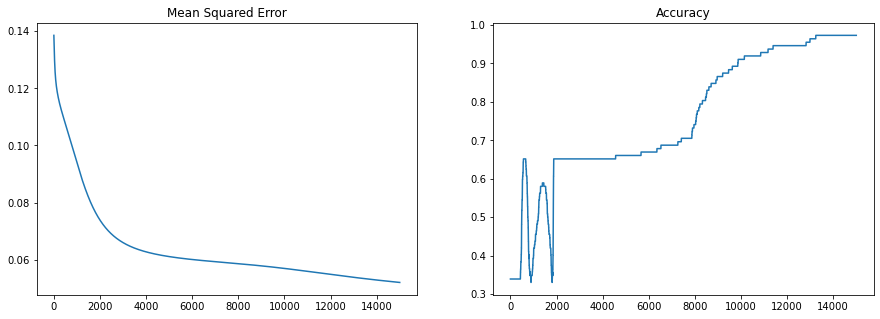

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

monitoring_df = pd.DataFrame(monitoring)

fig, axes = plt.subplots(1, 2, figsize=(15,5))
monitoring_df.mean_squared_error.plot(ax=axes[0], title="Mean Squared Error")
monitoring_df.accuracy.plot(ax=axes[1], title="Accuracy");

# Test

In [13]:
hidden_layer_inputs = np.dot(X_test, weights_1)
hidden_layer_outputs = sigmoid(hidden_layer_inputs)

output_layer_inputs = np.dot(hidden_layer_outputs, weights_2)
output_layer_outputs = sigmoid(output_layer_inputs)

In [14]:
acc = accuracy(output_layer_outputs, y_test)
print("Accuracy: {}".format(acc))

Accuracy: 0.9736842105263158
